In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

In [40]:
df_2 = pd.read_csv('raw_ppg_2.csv', sep=',', usecols=[1,2])

print(df_2.tail())

print(f"\nTimestamp data type : {df_2['Timestamp'].dtype}")
print(f"IR Value data type : {df_2['IR Value'].dtype}")

     Timestamp  IR Value
579      70021  105550.0
580      70141  109944.0
581      70261  105573.0
582      70382  103015.0
583      70503   99883.0

Timestamp data type : int64
IR Value data type : float64


In [41]:
df_2['Timestamp'] = df_2['Timestamp'] / 1000

df_2.tail()

,Timestamp,IR Value
579,70.021,105550.0
580,70.141,109944.0
581,70.261,105573.0
582,70.382,103015.0
583,70.503,99883.0


In [42]:
def butter_lowpass(cutoff, fs, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

In [43]:
def butter_lowpass_filter(data, cutoff, fs, order=2):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [44]:
t_2 = df_2['Timestamp'].values
ppg_signal_2 = df_2['IR Value'].values

In [45]:
fs = 1 / (t_2[1] - t_2[0])
cutoff = 3.0
order = 2  

In [46]:
filtered_signal_2 = butter_lowpass_filter(ppg_signal_2, cutoff, fs, order)

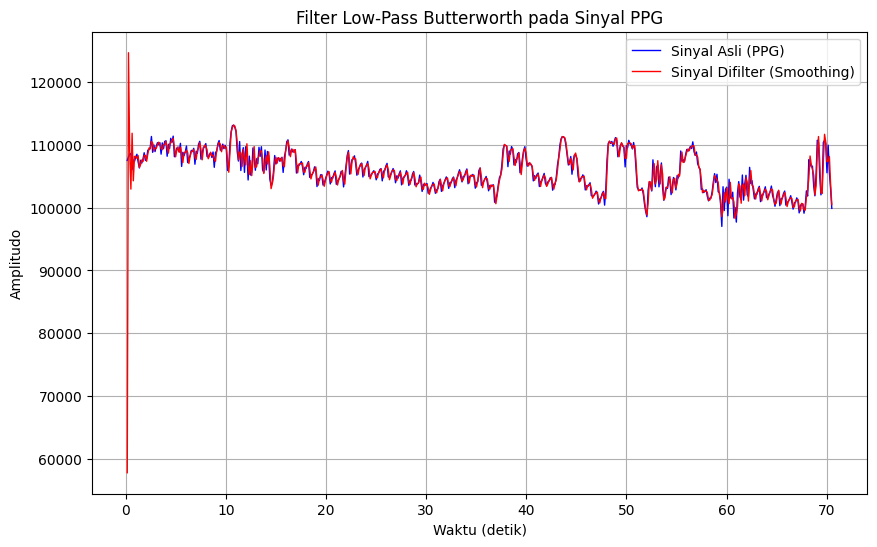

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(t_2, ppg_signal_2, label='Sinyal Asli (PPG)', color='blue', linewidth=1)
plt.plot(t_2, filtered_signal_2, label='Sinyal Difilter (Smoothing)', color='red', linewidth=1)
plt.title('Filter Low-Pass Butterworth pada Sinyal PPG')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.legend()
plt.grid()
plt.show()

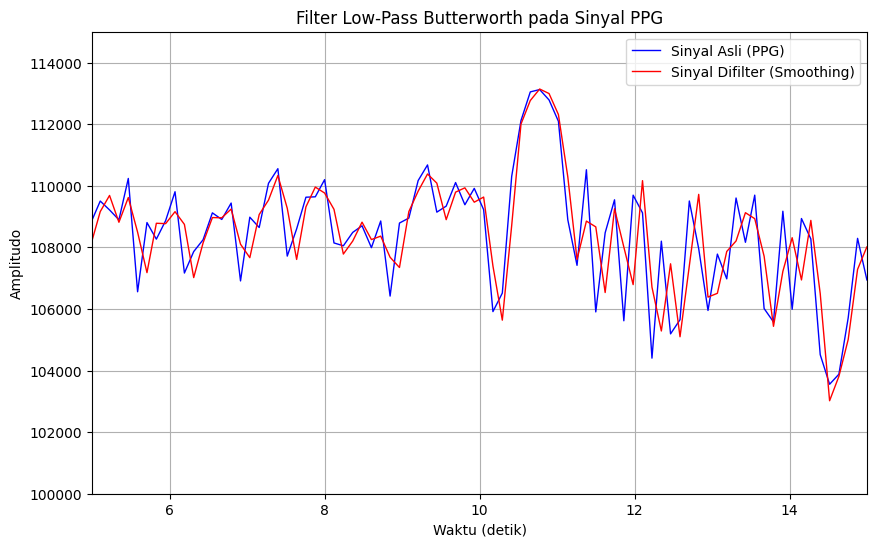

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(t_2, ppg_signal_2, label='Sinyal Asli (PPG)', color='blue', linewidth=1)
plt.plot(t_2, filtered_signal_2, label='Sinyal Difilter (Smoothing)', color='red', linewidth=1)
plt.xlim(5,15)
plt.ylim(100000,115000)
plt.title('Filter Low-Pass Butterworth pada Sinyal PPG')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.legend()
plt.grid()
plt.show()

In [49]:
df_1 = pd.read_csv('raw_ppg_1.csv', sep=',', usecols=[1,2])

df_1['Timestamp'] = df_1['Timestamp'] / 1000

df_1.tail()

,Timestamp,IR Value
579,70.011,110246.0
580,70.133,110316.0
581,70.254,109304.0
582,70.373,109880.0
583,70.495,109809.0


In [50]:
t_1 = df_1['Timestamp'].values
ppg_signal_1 = df_1['IR Value'].values

In [52]:
fs = 1 / (t_1[1] - t_1[0])
cutoff = 3.0
order = 2  

In [53]:
filtered_signal_1 = butter_lowpass_filter(ppg_signal_1, cutoff, fs, order)

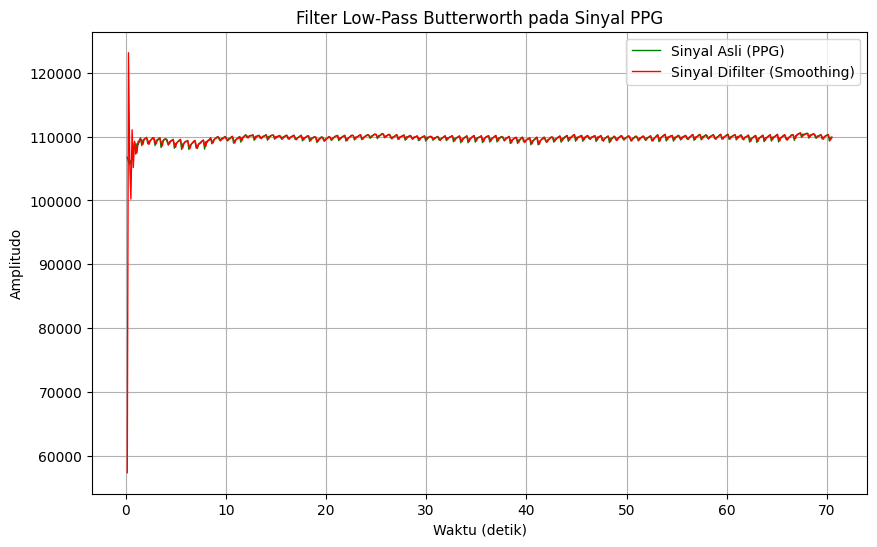

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(t_1, ppg_signal_1, label='Sinyal Asli (PPG)', color='green', linewidth=1)
plt.plot(t_1, filtered_signal_1, label='Sinyal Difilter (Smoothing)', color='red', linewidth=1)
plt.title('Filter Low-Pass Butterworth pada Sinyal PPG')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.legend()
plt.grid()
plt.show()

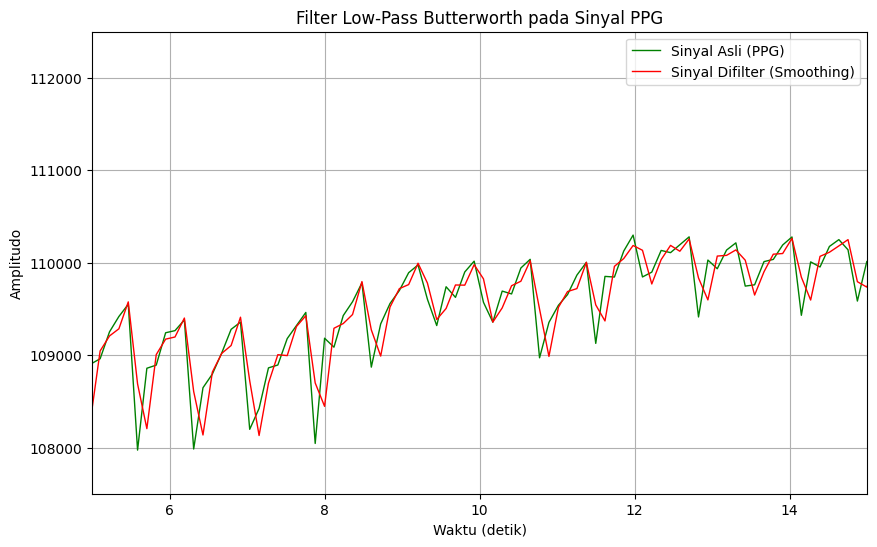

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(t_1, ppg_signal_1, label='Sinyal Asli (PPG)',color='green', linewidth=1)
plt.plot(t_1, filtered_signal_1, label='Sinyal Difilter (Smoothing)', color='red', linewidth=1)
plt.xlim(5, 15)
plt.ylim(107500,112500)
plt.title('Filter Low-Pass Butterworth pada Sinyal PPG')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.legend()
plt.grid()
plt.show()

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

normalized_ppg_signal_1 = min_max_scaler.fit_transform(ppg_signal_1.reshape(-1, 1))
normalized_filtered_signal_1 = min_max_scaler.fit_transform(filtered_signal_1.reshape(-1, 1))
normalized_ppg_signal_2 = min_max_scaler.fit_transform(ppg_signal_2.reshape(-1, 1))
normalized_filtered_signal_2 = min_max_scaler.fit_transform(filtered_signal_2.reshape(-1, 1))

In [69]:
# calculate std
ppg1_std = np.std(normalized_ppg_signal_1)
ppg1_filtered_std = np.std(normalized_filtered_signal_1)

ppg2_std = np.std(normalized_ppg_signal_2)
ppg2_filtered_std = np.std(normalized_filtered_signal_2)


print(f"std of ppg signal 1 :{ppg1_std}")
print(f"std of filtered ppg signal 1 :{ppg1_filtered_std}")

print(f"std of ppg signal 2 :{ppg2_std}")
print(f"std of filtered ppg signal 2 :{ppg2_filtered_std}")

std of ppg signal 1 :0.10843792439581866
std of filtered ppg signal 1 :0.035230241717995894
std of ppg signal 2 :0.1861855265643536
std of filtered ppg signal 2 :0.05453598889898809
